In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, inspect, sys

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 


In [3]:
def plot_barplot(labels,heights,error,title_text):
    fig, ax = plt.subplots()
    ax.bar(labels,heights,yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10, color="gray")
    ax.set_title(title_text)
    ax.set_ylabel('NLO')
    plt.xticks(rotation=45)
    plt.show()

### Data exploration for NLO

In [4]:
df = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Extracted_data/NLO_result.csv'),
                    index_col=0)


In [5]:
mean_df = df.groupby('Sample').mean()
mean_df['ID'] = mean_df.index
mean_df.reset_index(inplace=True)
mean_df.sort_values(by=['Stress'], inplace=True) 
mean_df['Stress'] = mean_df['Stress'].astype(str)


Plot the NLO average for each sample colored by number of cycles. With stdev

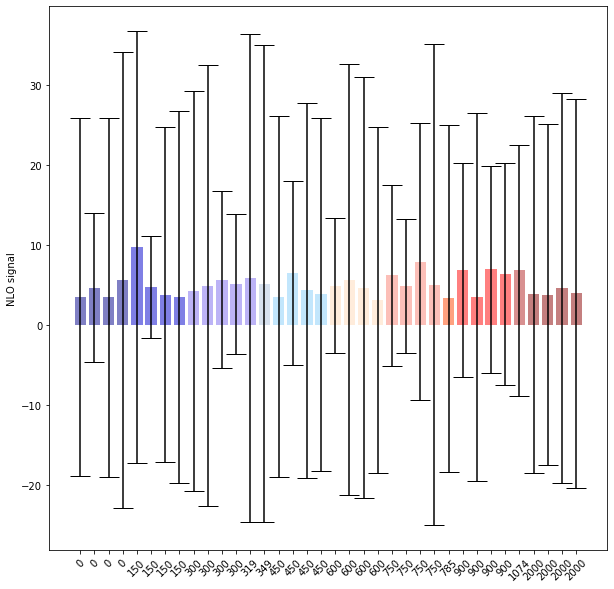

In [55]:
color_dict = { '0':'darkblue', '150':'mediumblue', '300':'mediumslateblue', '319':'mediumslateblue', 
    '349':'lightsteelblue', '450':'lightskyblue', '600':'peachpuff', '750':'salmon',
    '785':'orangered', '900':'red','1074':'firebrick', '2000':"darkred" }


fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(mean_df.index.astype(str),mean_df['Average'],yerr=mean_df['St Dev'], 
       align='center', alpha=0.5, ecolor='black', capsize=10, color=[color_dict[r] for r in mean_df['Stress']])
ax.set_xticklabels(mean_df['Stress'])
ax.set_title("")
ax.set_ylabel('NLO signal')
plt.xticks(rotation=45)
plt.show()

Plot using the uncertainty instead of standard deviation. 

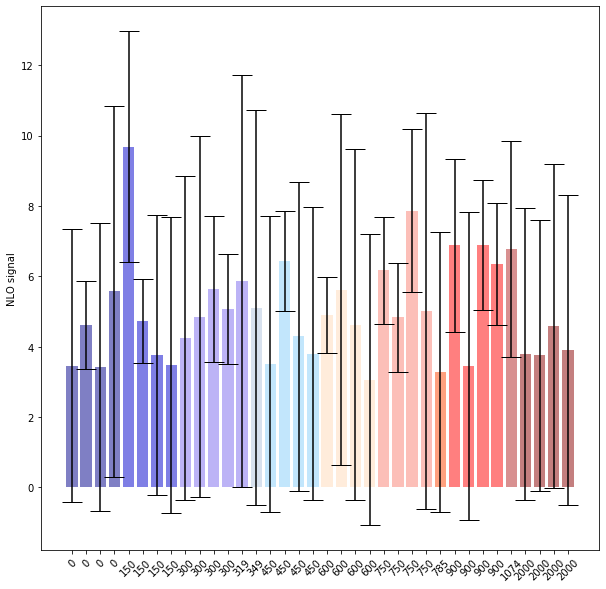

In [56]:

fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(mean_df.index.astype(str),mean_df['Average'],yerr=mean_df['Confidence'], 
       align='center', alpha=0.5, ecolor='black', capsize=10, color=[color_dict[r] for r in mean_df['Stress']])
ax.set_xticklabels(mean_df['Stress'])
ax.set_title("")
ax.set_ylabel('NLO signal')
plt.xticks(rotation=45)
plt.show()

### Compare to failure
Load data with time to failure computed and compare.

In [6]:
df = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/Survival_df.csv'),
                    index_col=0)


Text(0, 0.5, 'NLO average')

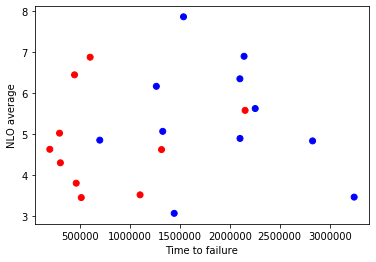

In [7]:
colordict={True:'red', False:'blue'}
plt.scatter(y=df.NLO_avg,x=df.F_Time, c=[colordict[c] for c in df.Observed])
plt.xlabel('Time to failure')
plt.ylabel('NLO average')


Text(0, 0.5, 'NLO average')

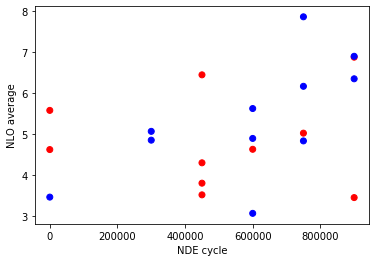

In [8]:
colordict={True:'red', False:'blue'}
plt.scatter(y=df.NLO_avg,x=df.NDE_cycle, c=[colordict[c] for c in df.Observed])
plt.xlabel('NDE cycle')
plt.ylabel('NLO average')
